# Projeto: Desempenho de Vendas e Representantes 

In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

In [4]:
# 1. Carregar dados
# ----------------------------
file_path = "2A - Base de Dados - Exportações.xlsx"
df = pd.read_excel(file_path, sheet_name="Registros de Vendas")

# Remover coluna vazia
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Criar coluna de faturamento
df["Faturamento"] = df["Quantidade_Vendida"] * df["Preço_Unitário"]

# Converter datas
df["Data_Pedido"] = pd.to_datetime(df["Data_Pedido"], errors="coerce")


In [5]:
# 2. Análises principais
# ----------------------------

# 2.1 Total de vendas
total_vendas = df["Faturamento"].sum()
print(f"💰 Faturamento Total: R$ {total_vendas:,.2f}")

# 2.2 Ranking de Representantes
top_representantes = (
    df.groupby("Nome_Representante")["Faturamento"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print("\n🏆 Top Representantes:\n", top_representantes)

# 2.3 Produtos mais vendidos
top_produtos = (
    df.groupby("Nome_Produto")["Faturamento"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print("\n📦 Top Produtos:\n", top_produtos)

# 2.4 Faturamento por Categoria
categoria_vendas = df.groupby("Categoria")["Faturamento"].sum()

# 2.5 Faturamento por Localidade
localidade_vendas = (
    df.groupby("Localidade")["Faturamento"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print("\n🌍 Top Localidades:\n", localidade_vendas)

# 2.6 Série temporal (mensal)
df["AnoMes"] = df["Data_Pedido"].dt.to_period("M")
mensal_vendas = df.groupby("AnoMes")["Faturamento"].sum()



💰 Faturamento Total: R$ 419,146,278.00

🏆 Top Representantes:
 Nome_Representante
Felipe Seixas       109915484
Isabela Carolina    106326328
Maria Silva         105242646
Teobaldo Junior      97661820
Name: Faturamento, dtype: int64

📦 Top Produtos:
 Nome_Produto
Notebook Mod 3    178157600
Notebook Mod 2     79715760
Celular Mod 3      67514400
Celular Mod 2      48931818
Notebook Mod 1     25871500
Celular Mod 1      18955200
Name: Faturamento, dtype: int64

🌍 Top Localidades:
 Localidade
Estados Unidos/América do Norte    127506014
China/Ásia                          80015600
Japão/Ásia                          57911820
Rússia/Europa                       38738760
França/Europa                       31683556
Itália/Europa                       20506150
Alemanha/Europa                     20447180
Índia/Ásia                          12136340
Portugal/Europa                     12028400
Canadá/América do Norte             12016798
Name: Faturamento, dtype: int64


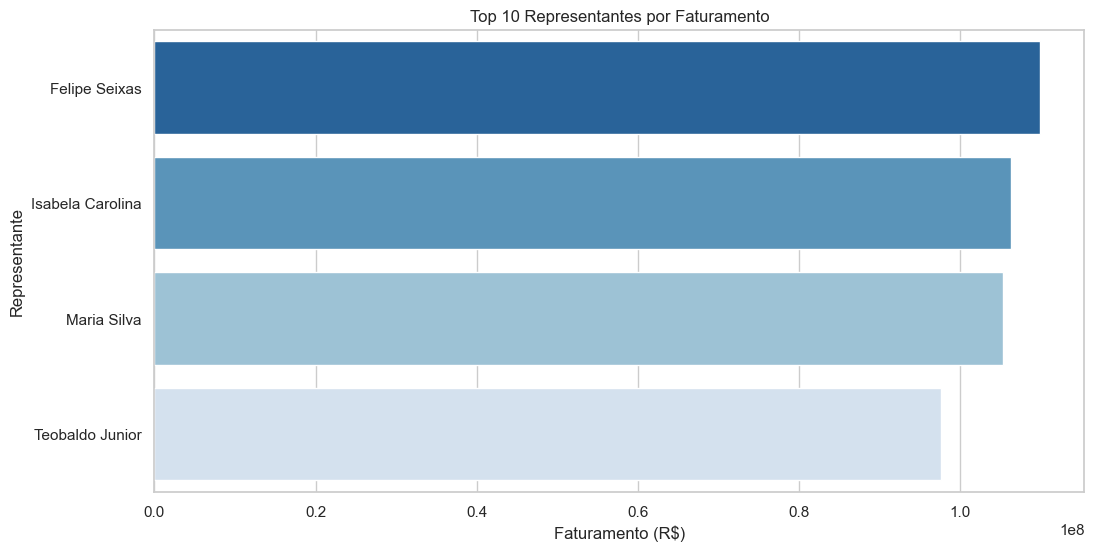

In [13]:
# Gráfico 1: Top 10 Representantes
plt.figure()
sns.barplot(
    x=top_representantes.values,
    y=top_representantes.index,
    hue=top_representantes.index,
    palette="Blues_r",
    legend=False
 )
plt.title("Top 10 Representantes por Faturamento")
plt.xlabel("Faturamento (R$)")
plt.ylabel("Representante")
plt.show()

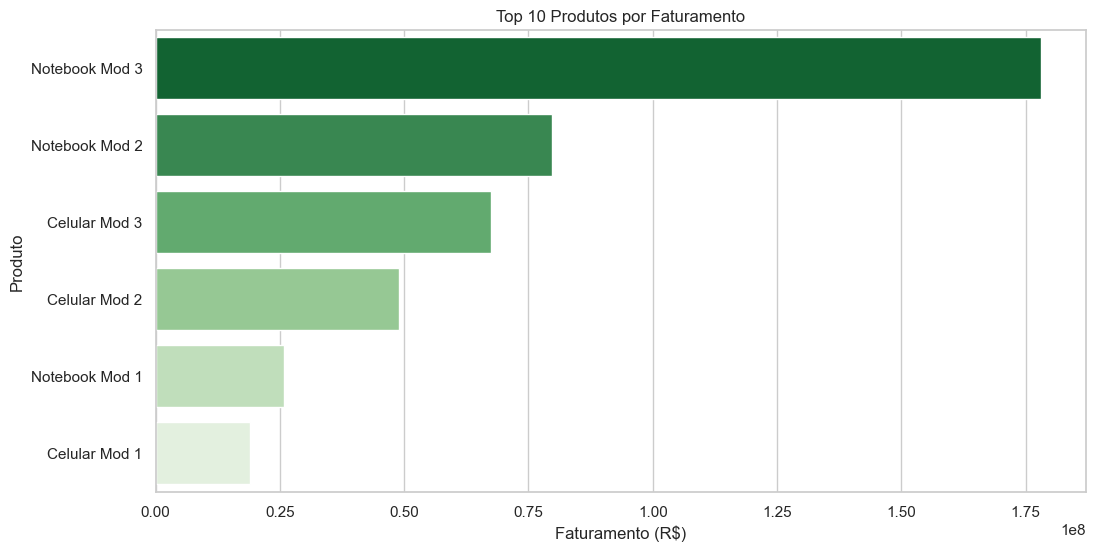

In [14]:
# Gráfico 2: Top 10 Produtos
plt.figure()
sns.barplot(
    x=top_produtos.values,
    y=top_produtos.index,
    hue=top_produtos.index,
    palette="Greens_r",
    legend=False
)
plt.title("Top 10 Produtos por Faturamento")
plt.xlabel("Faturamento (R$)")
plt.ylabel("Produto")
plt.show()

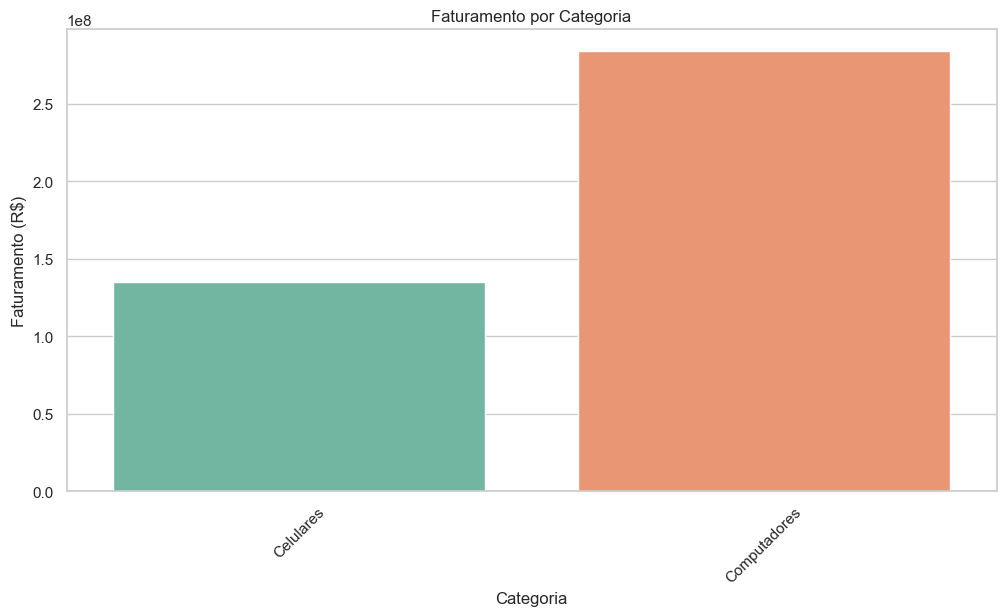

In [15]:
# Gráfico 3: Faturamento por Categoria
plt.figure()
sns.barplot(
    x=categoria_vendas.index,
    y=categoria_vendas.values,
    hue=categoria_vendas.index,
    palette="Set2",
    legend=False
)
plt.title("Faturamento por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)
plt.show()

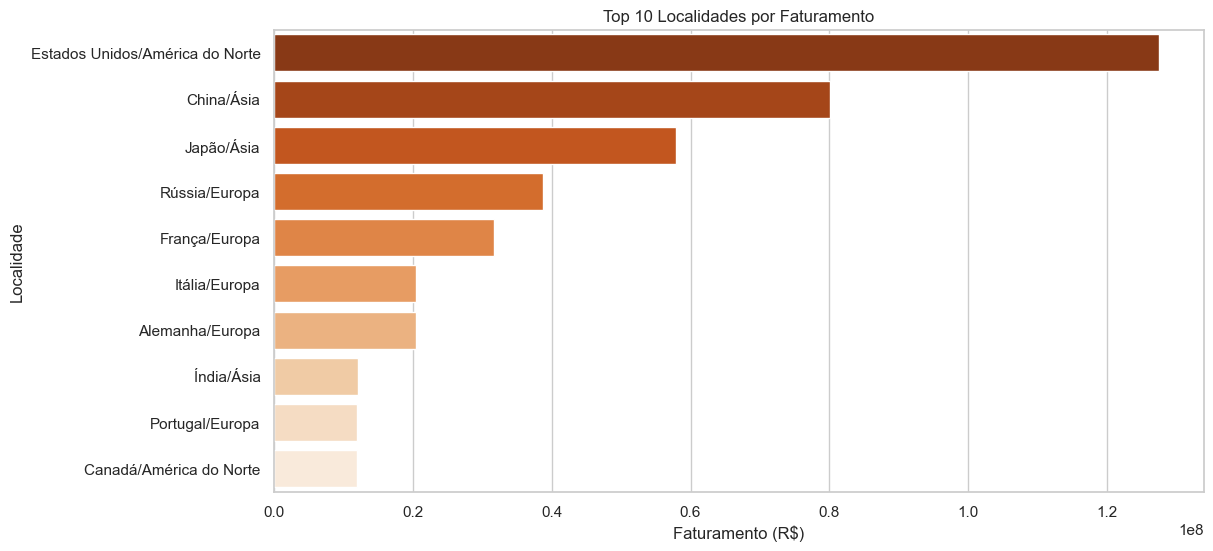

In [16]:
# Gráfico 4: Top Localidades
plt.figure()
sns.barplot(
    x=localidade_vendas.values,
    y=localidade_vendas.index,
    hue=localidade_vendas.index,
    palette="Oranges_r",
    legend=False
)
plt.title("Top 10 Localidades por Faturamento")
plt.xlabel("Faturamento (R$)")
plt.ylabel("Localidade")
plt.show()

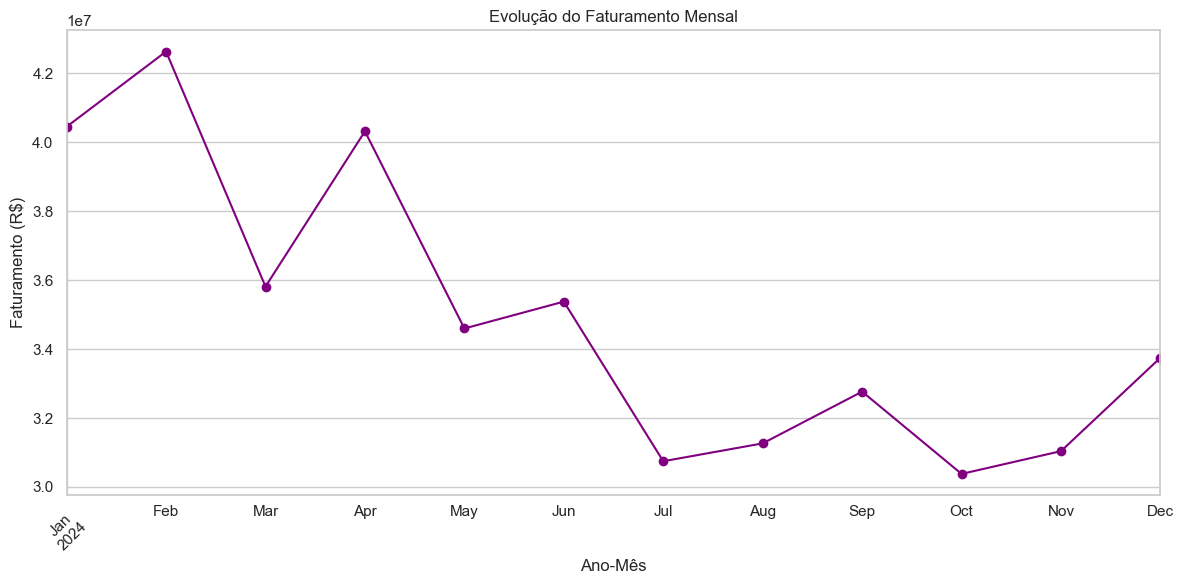

In [10]:
# Gráfico 5: Série Temporal (Mensal)
plt.figure()
mensal_vendas.plot(kind="line", marker="o", color="purple")
plt.title("Evolução do Faturamento Mensal")
plt.xlabel("Ano-Mês")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [17]:
# 4. Exportar resultados
# ----------------------------
df.to_csv("exportacoes_com_faturamento.csv", index=False)
top_representantes.to_csv("ranking_representantes.csv")
top_produtos.to_csv("ranking_produtos.csv")
categoria_vendas.to_csv("vendas_categoria.csv")
localidade_vendas.to_csv("vendas_localidade.csv")
mensal_vendas.to_csv("faturamento_mensal.csv")
print("✅ Arquivos exportados: resultados agregados salvos em CSV")

✅ Arquivos exportados: resultados agregados salvos em CSV
